Cell 1 — Imports and setup

In [ ]:
# Basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 20)
sns.set(style="whitegrid")



In [3]:
import glob
import pandas as pd
import os

dataset_folder = "Cleaned_Dataset"

all_files = glob.glob(os.path.join(dataset_folder, "*.csv"))

df_merged = None

for f in all_files:
    df = pd.read_csv(f, index_col=0)

    if df_merged is None:
        df_merged = df
    else:
        # merge by rows (CpGs), add new samples as new columns
        df_merged = pd.concat([df_merged, df], axis=1)

# save merged file
merged_file = os.path.join(dataset_folder, "GSE207605_merged.csv")
df_merged.to_csv(merged_file)

print("Final shape:", df_merged.shape)


Final shape: (2375, 5797)


Load the merged dataset

In [4]:
# Load merged dataset
df = pd.read_csv(merged_file)

# Basic overview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2375, 5798)


,sample_IDs,GSM765873,GSM765869,GSM765865,GSM765876,GSM765867,GSM765863,GSM765862,GSM765878,GSM765870,GSM765879,GSM765874,GSM765872,GSM765877,GSM765871,GSM765864,GSM765875,GSM765866,GSM765860,GSM765880,GSM765868,GSM880047,GSM880021,GSM880049,GSM880018,GSM880041,GSM880168,GSM880152,GSM880065,GSM880051,GSM880162,GSM880034,GSM880144,GSM880025,GSM880050,GSM880173,GSM880142,GSM879997,GSM880182,GSM880179,GSM880153,GSM880014,GSM880013,GSM880011,GSM880154,GSM880027,GSM880033,GSM880039,GSM880163,GSM880044,...,GSM1868147,GSM1868181,GSM1868256,GSM1868126,GSM1868337,GSM1868142,GSM1868363,GSM1868393,GSM1868405,GSM1868128,GSM1868370,GSM1868375,GSM1868380,GSM1868356,GSM1868345,GSM1868245,GSM1868240,GSM1868188,GSM1868205,GSM1868173,GSM1868169,GSM1946548,GSM1868269,GSM1868040,GSM1868314,GSM1868367,GSM1868374,GSM1868091,GSM1868092,GSM1868056,GSM1868187,GSM1868318,GSM1868233,GSM1946531,GSM1868082,GSM1868384,GSM1868383,GSM1868171,GSM1868316,GSM1868141,GSM1868406,GSM1868232,GSM1868135,GSM1868412,GSM1868399,GSM1868143,GSM1868176,GSM1868324,GSM1868168,GSM1868196
0,age,90.000,90.000,97.000,91.000,96.000,95.000,97.000,89.000,91.000,90.000,89.000,89.000,89.000,92.000,97.000,90.000,98.000,103.000,90.000,100.000,2.000,16.922,3.666,1.000,2.250,11.000,3.584,1.250,4.832,1.917,4.082,3.084,4.000,9.586,6.250,13.000,4.582,2.416,1.333,1.250,2.000,2.584,16.828,12.414,1.500,1.000,13.086,7.250,1.583,...,39.0,43.0,26.0,35.0,57.0,55.0,55.0,47.0,46.0,27.0,56.0,39.0,31.0,25.0,48.0,56.0,19.0,23.0,35.0,30.0,44.0,37.0,20.0,24.0,46.0,52.0,18.0,50.0,49.0,18.0,50.0,66.0,48.0,31.0,20.0,48.0,18.0,64.0,54.0,54.0,50.0,54.0,36.0,54.0,20.0,34.0,34.0,24.0,21.0,52.0
1,cg00013196,0.917,0.894,0.894,0.903,0.921,0.871,0.877,0.908,0.917,0.907,0.893,0.910,0.904,0.911,0.893,0.897,0.893,0.900,0.908,0.882,0.927,0.918,0.916,0.917,0.916,0.902,0.926,0.913,0.907,0.923,0.920,0.933,0.907,0.917,0.917,0.918,0.927,0.938,0.923,0.929,0.928,0.918,0.917,0.919,0.928,0.902,0.928,0.920,0.917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cg00025185,0.922,0.913,0.899,0.918,0.895,0.906,0.883,0.898,0.917,0.916,0.891,0.908,0.896,0.907,0.902,0.902,0.914,0.888,0.905,0.899,0.913,0.915,0.910,0.901,0.923,0.903,0.925,0.906,0.903,0.909,0.932,0.930,0.908,0.909,0.916,0.933,0.915,0.929,0.934,0.928,0.884,0.901,0.929,0.930,0.889,0.934,0.918,0.933,0.914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00038233,0.830,0.790,0.759,0.772,0.843,0.770,0.783,0.804,0.791,0.848,0.772,0.814,0.785,0.790,0.781,0.758,0.789,0.809,0.754,0.782,0.837,0.761,0.817,0.782,0.811,0.769,0.792,0.780,0.791,0.749,0.804,0.801,0.761,0.804,0.777,0.761,0.800,0.770,0.815,0.776,0.787,0.755,0.782,0.759,0.763,0.820,0.808,0.758,0.803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cg00051623,0.869,0.838,0.788,0.823,0.877,0.818,0.810,0.821,0.830,0.855,0.840,0.821,0.842,0.837,0.826,0.806,0.848,0.832,0.821,0.822,0.851,0.806,0.836,0.798,0.839,0.814,0.837,0.808,0.833,0.833,0.835,0.845,0.782,0.842,0.840,0.831,0.842,0.837,0.845,0.828,0.806,0.813,0.850,0.829,0.775,0.819,0.819,0.837,0.834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns)


Index(['sample_IDs', 'GSM765873', 'GSM765869', 'GSM765865', 'GSM765876',
       'GSM765867', 'GSM765863', 'GSM765862', 'GSM765878', 'GSM765870',
       ...
       'GSM1868406', 'GSM1868232', 'GSM1868135', 'GSM1868412', 'GSM1868399',
       'GSM1868143', 'GSM1868176', 'GSM1868324', 'GSM1868168', 'GSM1868196'],
      dtype='object', length=5798)


Check shape and basic stat

In [6]:
print(df.shape)
df.describe().T


(2375, 5798)


,count,mean,std,min,25%,50%,75%,max
GSM765873,2374.0,0.650281,1.862802,0.026,0.28125,0.8135,0.90000,90.0
GSM765869,2373.0,0.641148,1.858601,0.036,0.30500,0.7540,0.87100,90.0
GSM765865,2374.0,0.624649,2.002766,0.033,0.26800,0.7495,0.86700,97.0
GSM765876,2375.0,0.623597,1.880719,0.033,0.26900,0.7560,0.87000,91.0
GSM765867,2375.0,0.649214,1.984053,0.026,0.28150,0.8100,0.89900,96.0
...,...,...,...,...,...,...,...,...
GSM1868143,1046.0,0.362492,1.064038,0.001,0.16925,0.2725,0.42575,34.0
GSM1868176,1044.0,0.355590,1.066701,0.003,0.15500,0.2640,0.41700,34.0
GSM1868324,1045.0,0.326597,0.771101,0.000,0.12200,0.2330,0.41200,24.0
GSM1868168,1046.0,0.322681,0.684098,0.000,0.11800,0.2335,0.41375,21.0


Check missing values

In [7]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_values,
    "missing_percent": missing_percent
}).sort_values("missing_percent", ascending=False)

missing_summary.head(20)


,missing_count,missing_percent
GSM1696352,1395,58.736842
GSM1696518,1395,58.736842
GSM1696344,1395,58.736842
GSM1696415,1395,58.736842
GSM1696464,1395,58.736842
GSM1696517,1395,58.736842
GSM1696421,1395,58.736842
GSM1696424,1395,58.736842
GSM1696386,1395,58.736842
GSM1696549,1395,58.736842


In [11]:
# Set the first column ("sample_IDs") as index
df = df.set_index("sample_IDs")


Create CpG-only matrix and transpose


In [12]:
# Remove "age" row (now it exists)
df_cpg = df.drop(index="age")

# Transpose → samples = rows, CpGs = columns
df_samples = df_cpg.T

print(df_cpg.shape)
print(df_samples.shape)


(2374, 5797)
(5797, 2374)


Visualize Outliers (Barplot)

Detect outliers per sample

In [13]:
import numpy as np

def detect_outliers_iqr(row):
    row = row.dropna()  # remove NaN CpG values
    Q1 = np.percentile(row, 25)
    Q3 = np.percentile(row, 75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return ((row < low) | (row > high)).sum()

# Count outliers for each GSM sample
outliers_per_sample = df_samples.apply(detect_outliers_iqr, axis=1)

# Convert to DataFrame (nice cell/table format)
outlier_table = outliers_per_sample.to_frame(name="Outlier_Count")
outlier_table


,Outlier_Count
GSM765873,0
GSM765869,0
GSM765865,0
GSM765876,0
GSM765867,0
...,...
GSM1868143,58
GSM1868176,68
GSM1868324,61
GSM1868168,54


Visualize Outliers (Barplot)

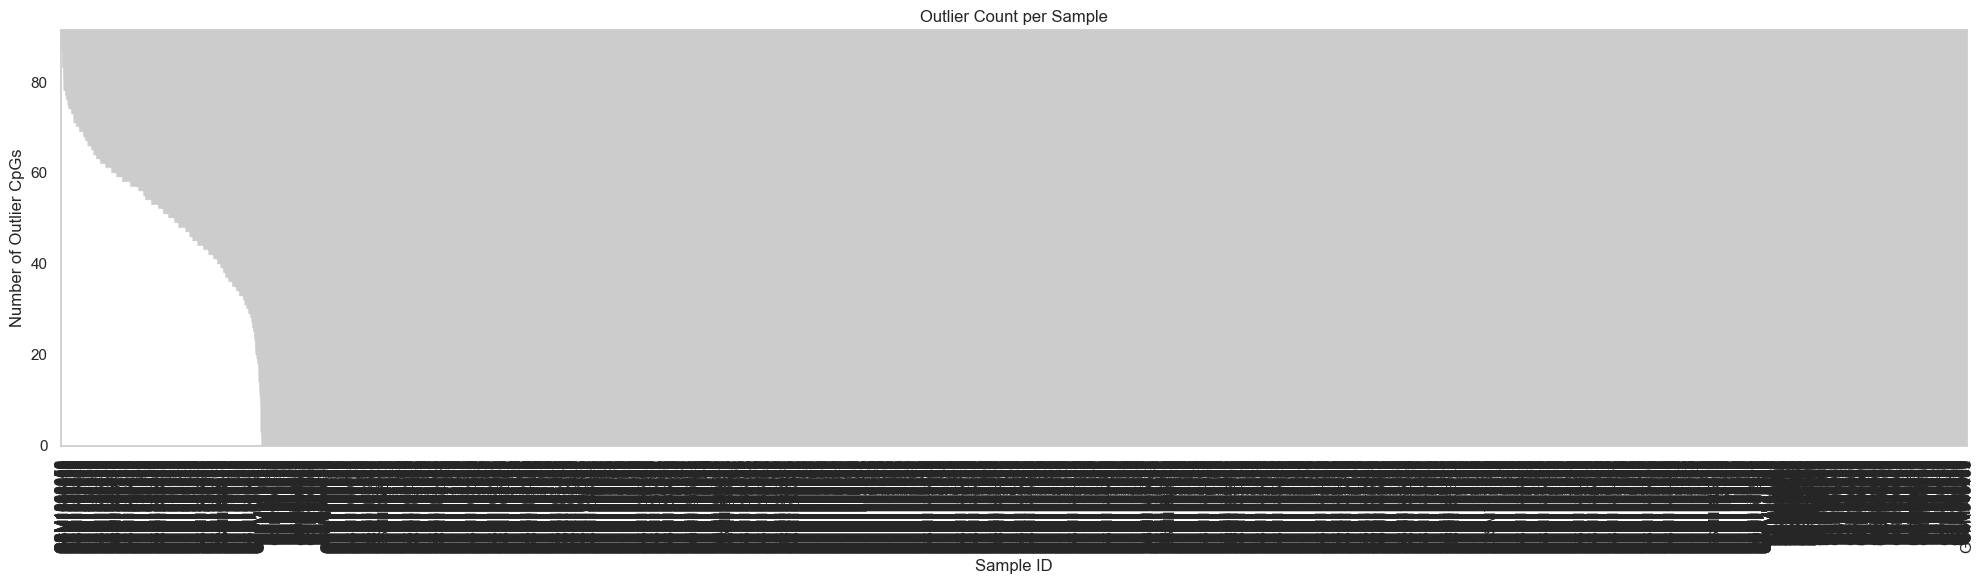

In [15]:
plt.figure(figsize=(20,6))
outliers_per_sample.sort_values(ascending=False).plot(kind="bar")
plt.title("Outlier Count per Sample")
plt.xlabel("Sample ID")
plt.ylabel("Number of Outlier CpGs")
plt.tight_layout()
plt.show()


Boxplot of a Random Sample of CpG Sites

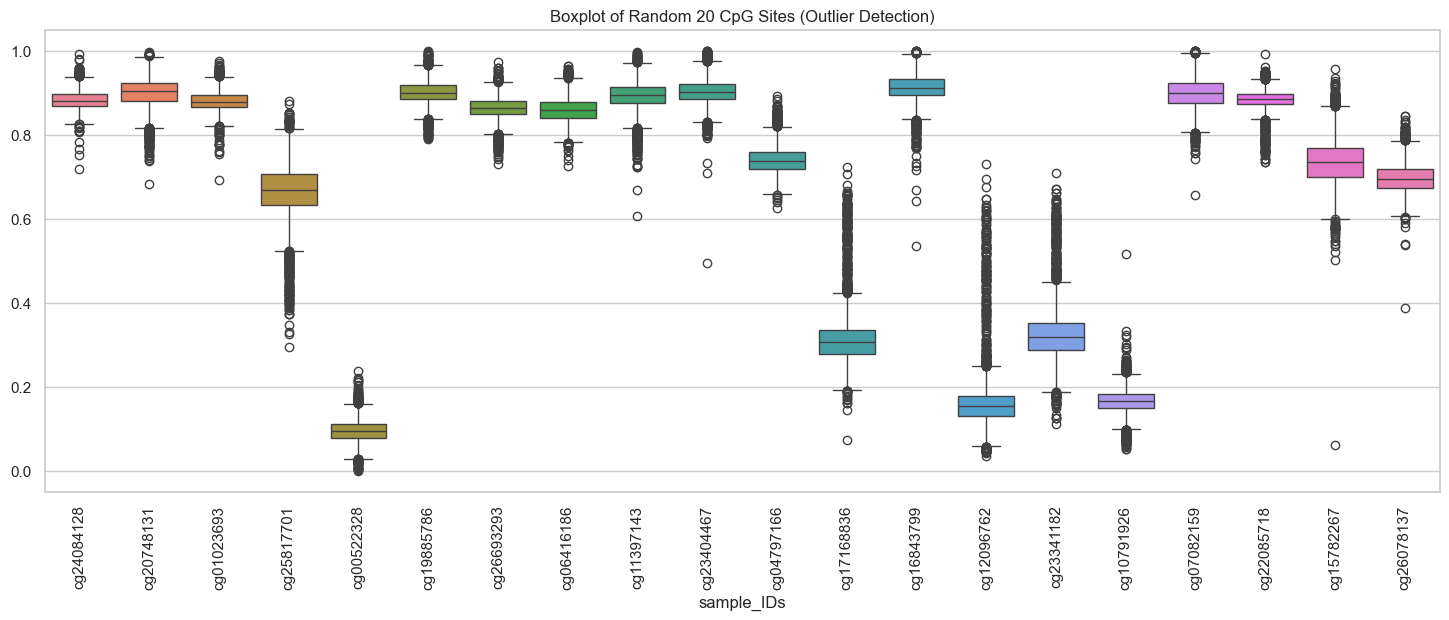

In [16]:
# Select a random sample of CpGs (example: 20 sites)
np.random.seed(42)
random_cpgs = np.random.choice(df_samples.columns, size=20, replace=False)

plt.figure(figsize=(18,6))
sns.boxplot(data=df_samples[random_cpgs])
plt.xticks(rotation=90)
plt.title("Boxplot of Random 20 CpG Sites (Outlier Detection)")
plt.show()


Boxplot of the Top 20 Most Variable CpG Sites

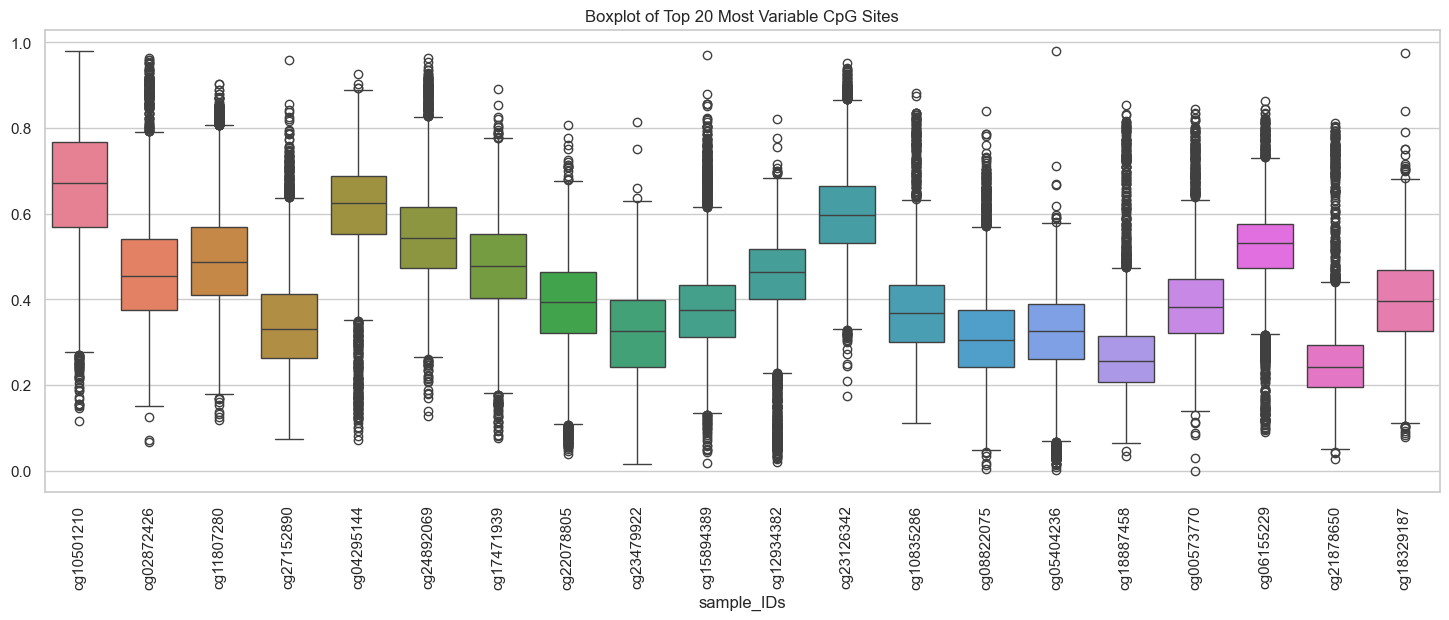

In [17]:
# Compute variance for each CpG
cpg_variance = df_samples.var().sort_values(ascending=False)

# Select top 20 most variable CpG sites
top20_cpgs = cpg_variance.head(20).index

plt.figure(figsize=(18,6))
sns.boxplot(data=df_samples[top20_cpgs])
plt.xticks(rotation=90)
plt.title("Boxplot of Top 20 Most Variable CpG Sites")
plt.show()


Box Plot per sample

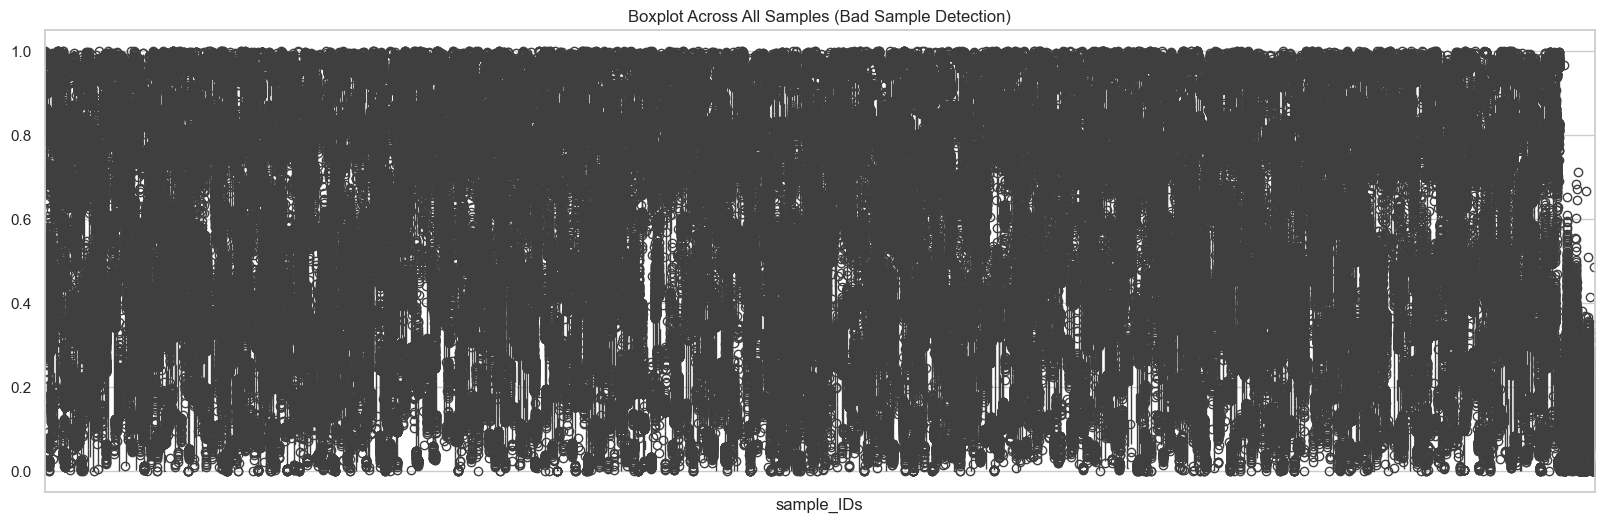

In [19]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df_samples)
plt.xticks([], [])  # too many samples → hide labels
plt.title("Boxplot Across All Samples (Bad Sample Detection)")
plt.show()


Transpose the DataFrame

In [26]:
# Make sure the first row contains 'age' or metadata
# Set first column as index
df = pd.read_csv(r"C:\Users\ayoub\OneDrive\Documents\DNA_Methylation\Cleaned_Dataset\GSE207605_merged.csv", index_col=0)


# Transpose so samples are rows
df_samples = df.T


# Check the first few rows
df_samples.head()


,age,cg00013196,cg00025185,cg00038233,cg00051623,cg00058879,cg00059225,cg00080081,cg00094319,cg00094518,cg00101260,cg00103778,cg00106920,cg00112558,cg00129827,cg00134695,cg00137846,cg00144180,cg00145253,cg00173768,cg00176863,cg00192750,cg00193668,cg00198759,cg00210839,cg00241427,cg00259097,cg00263314,cg00266920,cg00283771,cg00286125,cg00292135,cg00292701,cg00298065,cg00303541,cg00327072,cg00329615,cg00336555,cg00338758,cg00344709,cg00346208,cg00366531,cg00366594,cg00384539,cg00413617,cg00415665,cg00427669,cg00439658,cg00441703,cg00448395,...,ch.10.119748781R,ch.11.1155333R,ch.11.1877857R,ch.12.105153690R,ch.12.2222572R,ch.12.9379220R,ch.13.39564907R,ch.13.654879R,ch.14.1488981R,ch.14.93511233R,ch.14.97331099F,ch.15.67797584R,ch.16.2072386R,ch.16.55305377R,ch.17.29716121R,ch.19.16251119F,ch.19.21460585R,ch.19.931611R,ch.2.101965435R,ch.2.105901354F,ch.2.109048761R,ch.2.11889418R,ch.2.207814544R,ch.2.217478R,ch.2.30415474F,ch.2.37472519R,ch.2.4251330R,ch.2.42601115R,ch.2.43155345R,ch.2.47286786F,ch.20.1295406F,ch.20.50133246R,ch.22.30020508R,ch.3.638689R,ch.4.122145192R,ch.4.1889364R,ch.4.194519R,ch.5.2564734R,ch.5.432310R,ch.5.79606571R,ch.6.2925136R,ch.6.33611621F,ch.6.41978480R,ch.7.135065R,ch.7.2635062R,ch.7.2986028F,ch.7.3189261R,ch.8.103893680R,ch.8.128185533F,ch.9.1059422R
GSM765873,90.0,0.917,0.922,0.830,0.869,0.137,0.440,0.321,0.871,0.117,0.273,0.325,0.918,0.900,0.287,0.909,0.920,0.964,0.410,0.948,0.283,0.873,0.636,0.928,0.801,0.920,0.898,0.782,0.236,0.909,0.367,0.222,0.116,0.768,0.636,0.960,0.462,0.944,0.917,0.832,0.140,0.461,0.814,0.088,0.178,0.942,0.892,0.322,0.756,0.439,...,0.128,0.110,0.068,0.062,0.064,0.077,0.068,0.101,0.111,0.067,0.041,0.153,0.112,0.132,0.067,0.090,0.106,0.068,0.088,0.099,0.092,0.179,0.108,0.114,0.065,0.087,0.082,0.085,0.076,0.059,0.103,0.086,0.093,0.060,0.098,0.125,0.053,0.102,0.091,0.200,0.094,0.059,0.106,0.081,0.054,0.055,0.064,0.069,0.048,0.108
GSM765869,90.0,0.894,0.913,0.790,0.838,0.198,0.441,0.207,0.854,0.283,0.294,0.281,0.883,0.859,0.284,0.877,0.913,0.903,0.365,0.933,0.320,0.851,0.519,0.918,0.732,0.903,0.852,0.744,0.275,0.904,0.350,0.282,0.184,0.699,0.583,0.942,0.364,0.884,0.893,0.838,0.241,0.461,0.739,0.168,0.273,0.948,0.871,0.289,0.693,0.345,...,0.108,0.119,0.058,0.061,0.056,0.074,0.074,0.082,0.144,0.063,0.036,0.145,0.088,0.095,0.068,0.071,0.084,0.053,0.091,0.100,0.092,0.143,0.098,0.069,0.080,0.127,0.077,0.061,0.062,0.056,0.078,0.072,0.070,0.049,0.090,0.095,0.057,0.092,0.086,0.199,0.073,0.069,0.081,0.070,0.059,0.054,0.074,0.079,0.052,0.103
GSM765865,97.0,0.894,0.899,0.759,0.788,0.133,0.411,0.180,0.817,0.256,0.276,0.218,0.874,0.862,0.261,0.874,0.912,0.948,0.290,0.931,0.229,0.842,0.514,0.913,0.713,0.894,0.866,0.687,0.215,0.890,0.176,0.269,0.155,0.675,0.435,0.873,0.239,0.902,0.874,0.848,0.142,0.466,0.757,0.152,0.216,0.966,0.855,0.285,0.696,0.340,...,0.103,0.113,0.059,0.068,0.058,0.088,0.055,0.075,0.148,0.056,0.049,0.130,0.076,0.091,0.086,0.073,0.124,0.060,0.076,0.087,0.078,0.175,0.066,0.065,0.067,0.065,0.068,0.042,0.055,0.053,0.064,0.063,0.055,0.055,0.105,0.102,0.053,0.093,0.086,0.156,0.087,0.052,0.082,0.071,0.049,0.056,0.076,0.098,0.062,0.077
GSM765876,91.0,0.903,0.918,0.772,0.823,0.430,0.416,0.242,0.728,0.234,0.234,0.272,0.906,0.881,0.261,0.869,0.906,0.931,0.304,0.938,0.255,0.837,0.523,0.917,0.699,0.887,0.848,0.712,0.246,0.889,0.282,0.319,0.117,0.690,0.364,0.911,0.395,0.862,0.886,0.857,0.155,0.476,0.735,0.137,0.254,0.947,0.851,0.285,0.669,0.356,...,0.077,0.104,0.072,0.065,0.065,0.083,0.069,0.087,0.197,0.062,0.050,0.145,0.101,0.089,0.089,0.072,0.106,0.068,0.078,0.100,0.095,0.202,0.076,0.065,0.071,0.085,0.075,0.068,0.077,0.060,0.089,0.083,0.074,0.059,0.102,0.103,0.048,0.119,0.113,0.215,0.095,0.061,0.113,0.073,0.070,0.061,0.095,0.079,0.062,0.103
GSM765867,96.0,0.921,0.895,0.843,0.877,0.170,0.398,0.295,0.863,0.146,0.247,0.286,0.927,0.900,0.334,0.915,0.929,0.959,0.319,0.950,0.279,0.834,0.647,0.922,0.804,0.916,0.881,0.772,0.226,0.924,0.266,0.192,0.106,0.784,0.611,0.952,0.335,0.915,0.907,0.907,

In [ ]:
print("Shape of transposed matrix:", df_samples.shape)

Shape of transposed matrix: (5797, 2375)


Boxplot to visualize outliers for a few CpG sites

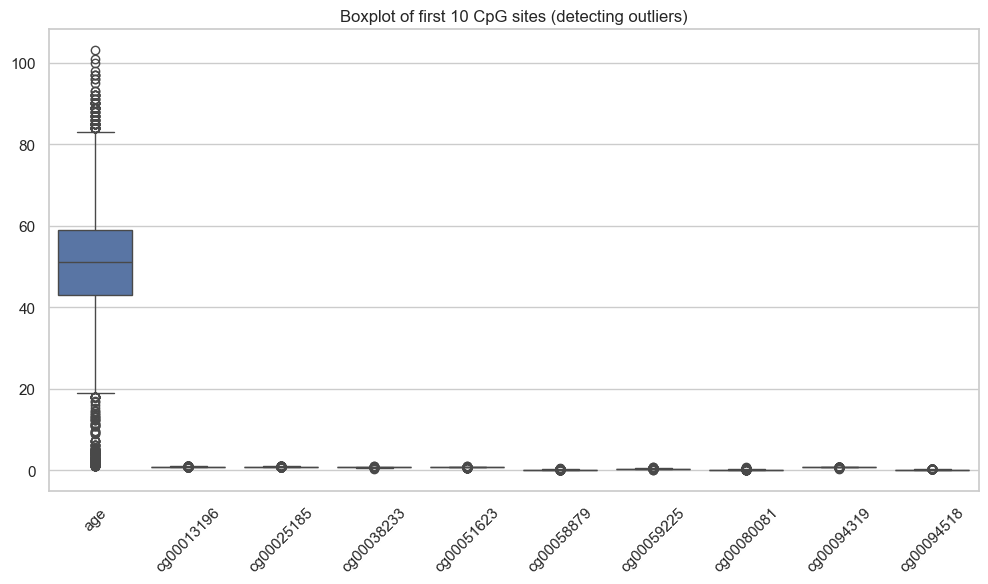

In [29]:
# Select a subset of CpGs for easier visualization
subset_cpgs = df_samples.columns[:10]  # first 10 CpGs

plt.figure(figsize=(12,6))
sns.boxplot(data=df_samples[subset_cpgs])
plt.xticks(rotation=45)
plt.title("Boxplot of first 10 CpG sites (detecting outliers)")
plt.show()


Detect outliers (IQR method)

In [31]:
# Function to mark outliers
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

outliers_mask = detect_outliers_iqr(df_samples)
print("Number of outlier values per CpG site:")
print(outliers_mask.sum())


Number of outlier values per CpG site:
age                255
cg00013196         146
cg00025185         146
cg00038233          39
cg00051623         115
                  ... 
ch.7.2986028F      273
ch.7.3189261R      274
ch.8.103893680R    236
ch.8.128185533F    543
ch.9.1059422R      276
Length: 2375, dtype: int64


Boxplot for All CpG Columns

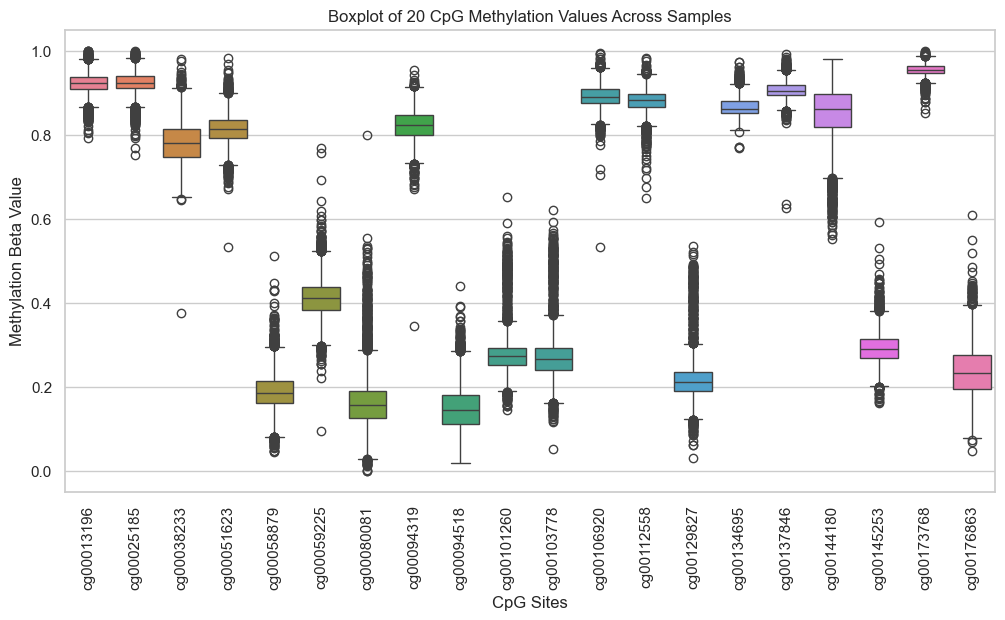

In [33]:
# Select first 20 CpG columns (excluding 'age')
cpg_columns_subset = [col for col in df_samples.columns if col != 'age'][:20]

# Plot boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_samples[cpg_columns_subset], orient='v', showfliers=True)
plt.xticks(rotation=90)
plt.title("Boxplot of 20 CpG Methylation Values Across Samples")
plt.ylabel("Methylation Beta Value")
plt.xlabel("CpG Sites")
plt.show()

Quick count of missing values per CpG

In [34]:
# Count missing values per CpG
missing_counts = df_samples.isna().sum()
print(missing_counts[missing_counts > 0])  # Only show CpGs with missing values


cg00013196         617
cg00025185         614
cg00038233         606
cg00051623         606
cg00080081          23
                  ... 
ch.7.2986028F      608
ch.7.3189261R      607
ch.8.103893680R    611
ch.8.128185533F      2
ch.9.1059422R      655
Length: 1954, dtype: int64



Visualize missing values with a heatmap

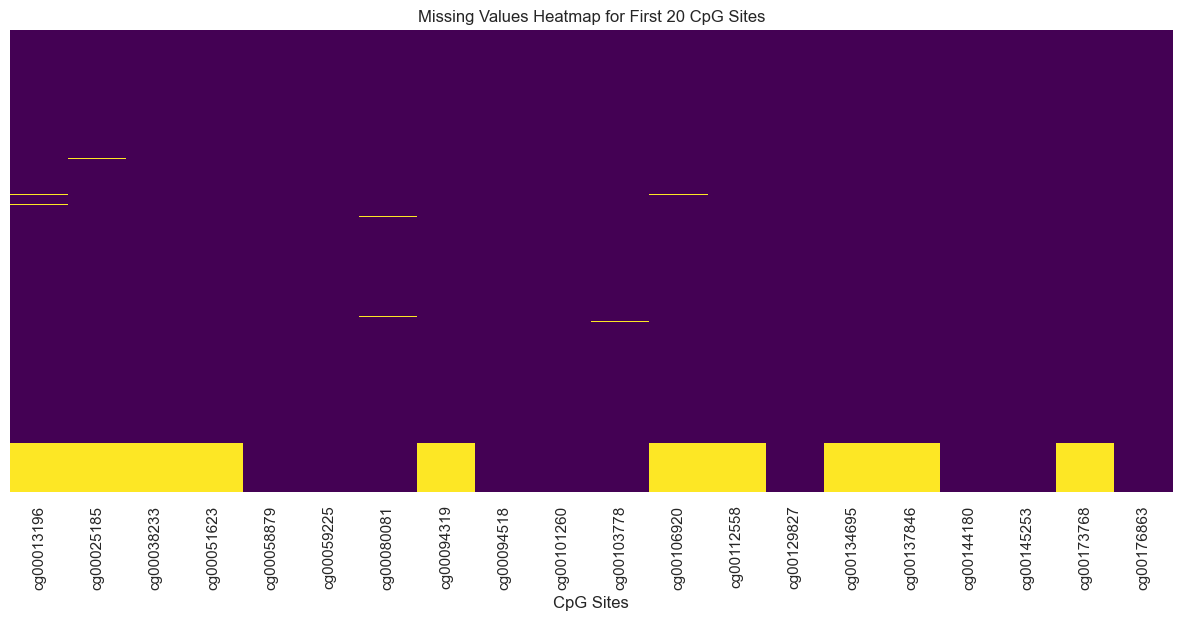

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(df_samples[cpg_columns_subset].isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap for First 20 CpG Sites")
plt.xlabel("CpG Sites")
plt.show()


Percentage of missing values per column

In [36]:

# Percentage of missing values per column
missing_percent = df_samples.isna().mean() * 100

# Show columns with missing values only
missing_percent = missing_percent[missing_percent > 0]
print(missing_percent)


cg00013196         10.643436
cg00025185         10.591685
cg00038233         10.453683
cg00051623         10.453683
cg00080081          0.396757
                     ...    
ch.7.2986028F      10.488184
ch.7.3189261R      10.470933
ch.8.103893680R    10.539934
ch.8.128185533F     0.034501
ch.9.1059422R      11.298948
Length: 1954, dtype: float64


DATA Cleaning

Remove columns with too many missing values

If a CpG site has a high percentage of missing values (e.g., >20%), it might be unreliable

In [51]:
# Drop columns where all values are missing
df_samples_clean = df_samples.dropna(axis=1, how='all')


In [45]:
threshold = 20  # percentage
missing_percent = df_samples_clean.isna().mean() * 100
cols_to_drop = missing_percent[missing_percent > threshold].index
df_samples_clean = df_samples_clean.drop(columns=cols_to_drop)


Handle remaining missing values
(Fill with column median)

In [46]:
df_samples_clean = df_samples_clean.fillna(df_samples_clean.median())


Remove duplicate columns or rows (if any)

In [47]:
# Remove duplicate CpG sites
df_samples_clean = df_samples_clean.loc[:, ~df_samples_clean.columns.duplicated()]

# Optional: remove duplicate samples
df_samples_clean = df_samples_clean[~df_samples_clean.index.duplicated()]


Filter low-variance CpG sites

In [48]:
variance_threshold = 0.01
low_var_cols = df_samples_clean.var()[df_samples_clean.var() < variance_threshold].index
df_samples_clean = df_samples_clean.drop(columns=low_var_cols)


Final checks

In [50]:
print("Original shape:", df_samples.shape)
print("Cleaned shape:", df_samples_clean.shape)


Original shape: (5797, 2375)
Cleaned shape: (5797, 22)


In [ ]:
df_samples_clean.describe()

,age,cg00573770,cg02872426,cg04295144,cg05404236,cg06155229,cg07164639,cg08822075,cg10501210,cg10835286,cg11807280,cg12934382,cg15894389,cg17471939,cg18329187,cg18887458,cg21878650,cg22078805,cg23126342,cg23479922,cg24892069,cg27152890
count,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000
mean,50.513570,0.391177,0.466938,0.611422,0.318957,0.512584,0.397511,0.316438,0.661215,0.376320,0.493878,0.447331,0.381389,0.477425,0.396215,0.273378,0.256304,0.388655,0.603290,0.317312,0.549850,0.347794
std,14.472905,0.103858,0.134094,0.116221,0.106500,0.103684,0.102673,0.107071,0.148293,0.108261,0.124252,0.109831,0.108920,0.112811,0.103269,0.105638,0.103310,0.111293,0.108638,0.110873,0.116229,0.120502
min,1.000000,0.000000,0.066000,0.072000,0.001000,0.089000,0.123000,0.004000,0.116000,0.112000,0.119000,0.021000,0.018000,0.076000,0.078000,0.035000,0.026000,0.038000,0.173000,0.016000,0.128000,0.073000
25%,43.000000,0.322000,0.375000,0.557000,0.260000,0.472000,0.334000,0.244000,0.569000,0.301000,0.409000,0.401000,0.317000,0.404000,0.325000,0.207000,0.196000,0.321000,0.531000,0.243000,0.474000,0.263000
50%,51.000000,0.382000,0.455000,0.624000,0.325000,0.531000,0.386000,0.304000,0.671000,0.367000,0.486000,0.464000,0.374000,0.477000,0.395000,0.255000,0.242000,0.393000,0.596000,0.325000,0.544000,0.331000
75%,59.000000,0.448000,0.541000,0.686000,0.388000,0.575000,0.442000,0.373000,0.767000,0.433000,0.568000,0.517000,0.431000,0.553000,0.468000,0.314000,0.294000,0.463000,0.665000,0.399000,0.615000,0.413000
max,103.000000,0.844000,0.963000,0.927000,0.980000,0.862000,0.903000,0.840000,0.981000,0.881000,0.904000,0.820000,0.971000,0.891000,0.976000,0.854000,0.811000,0.807000,0.951000,0.815000,0.963000,0.958000


huge drop — from 2375 CpG sites to only 22.

This tells us that most of your columns had either too many missing values or very low variance, which makes sense if the data comes from multiple sources or if only a small subset of CpGs is actually populated.

In [52]:
threshold = 50  # try a higher threshold
missing_percent = df_samples.isna().mean() * 100
cols_to_keep = missing_percent[missing_percent <= threshold].index
df_samples_clean = df_samples[cols_to_keep].fillna(df_samples.median())
print("Shape after cleaning:", df_samples_clean.shape)


Shape after cleaning: (5797, 2375)


Simple imputation (Median/Mean)

In [ ]:
df_samples_imputed = df_samples.fillna(df_samples.median())

KNN imputation:

In [54]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_samples_imputed = pd.DataFrame(imputer.fit_transform(df_samples), 
                                  index=df_samples.index, 
                                  columns=df_samples.columns)


In [55]:
df_samples_imputed.head()

,age,cg00013196,cg00025185,cg00038233,cg00051623,cg00058879,cg00059225,cg00080081,cg00094319,cg00094518,cg00101260,cg00103778,cg00106920,cg00112558,cg00129827,cg00134695,cg00137846,cg00144180,cg00145253,cg00173768,cg00176863,cg00192750,cg00193668,cg00198759,cg00210839,cg00241427,cg00259097,cg00263314,cg00266920,cg00283771,cg00286125,cg00292135,cg00292701,cg00298065,cg00303541,cg00327072,cg00329615,cg00336555,cg00338758,cg00344709,cg00346208,cg00366531,cg00366594,cg00384539,cg00413617,cg00415665,cg00427669,cg00439658,cg00441703,cg00448395,...,ch.10.119748781R,ch.11.1155333R,ch.11.1877857R,ch.12.105153690R,ch.12.2222572R,ch.12.9379220R,ch.13.39564907R,ch.13.654879R,ch.14.1488981R,ch.14.93511233R,ch.14.97331099F,ch.15.67797584R,ch.16.2072386R,ch.16.55305377R,ch.17.29716121R,ch.19.16251119F,ch.19.21460585R,ch.19.931611R,ch.2.101965435R,ch.2.105901354F,ch.2.109048761R,ch.2.11889418R,ch.2.207814544R,ch.2.217478R,ch.2.30415474F,ch.2.37472519R,ch.2.4251330R,ch.2.42601115R,ch.2.43155345R,ch.2.47286786F,ch.20.1295406F,ch.20.50133246R,ch.22.30020508R,ch.3.638689R,ch.4.122145192R,ch.4.1889364R,ch.4.194519R,ch.5.2564734R,ch.5.432310R,ch.5.79606571R,ch.6.2925136R,ch.6.33611621F,ch.6.41978480R,ch.7.135065R,ch.7.2635062R,ch.7.2986028F,ch.7.3189261R,ch.8.103893680R,ch.8.128185533F,ch.9.1059422R
GSM765873,90.0,0.917,0.922,0.830,0.869,0.137,0.440,0.321,0.871,0.117,0.273,0.325,0.918,0.900,0.287,0.909,0.920,0.964,0.410,0.948,0.283,0.873,0.636,0.928,0.801,0.920,0.898,0.782,0.236,0.909,0.367,0.222,0.116,0.768,0.636,0.960,0.462,0.944,0.917,0.832,0.140,0.461,0.814,0.088,0.178,0.942,0.892,0.322,0.756,0.439,...,0.128,0.110,0.068,0.062,0.064,0.077,0.068,0.101,0.111,0.067,0.041,0.153,0.112,0.132,0.067,0.090,0.106,0.068,0.088,0.099,0.092,0.179,0.108,0.114,0.065,0.087,0.082,0.085,0.076,0.059,0.103,0.086,0.093,0.060,0.098,0.125,0.053,0.102,0.091,0.200,0.094,0.059,0.106,0.081,0.054,0.055,0.064,0.069,0.048,0.108
GSM765869,90.0,0.894,0.913,0.790,0.838,0.198,0.441,0.207,0.854,0.283,0.294,0.281,0.883,0.859,0.284,0.877,0.913,0.903,0.365,0.933,0.320,0.851,0.519,0.918,0.732,0.903,0.852,0.744,0.275,0.904,0.350,0.282,0.184,0.699,0.583,0.942,0.364,0.884,0.893,0.838,0.241,0.461,0.739,0.168,0.273,0.948,0.871,0.289,0.693,0.345,...,0.108,0.119,0.058,0.061,0.056,0.074,0.074,0.082,0.144,0.063,0.036,0.145,0.088,0.095,0.068,0.071,0.084,0.053,0.091,0.100,0.092,0.143,0.098,0.069,0.080,0.127,0.077,0.061,0.062,0.056,0.078,0.072,0.070,0.049,0.090,0.095,0.057,0.092,0.086,0.199,0.073,0.069,0.081,0.070,0.059,0.054,0.074,0.079,0.052,0.103
GSM765865,97.0,0.894,0.899,0.759,0.788,0.133,0.411,0.180,0.817,0.256,0.276,0.218,0.874,0.862,0.261,0.874,0.912,0.948,0.290,0.931,0.229,0.842,0.514,0.913,0.713,0.894,0.866,0.687,0.215,0.890,0.176,0.269,0.155,0.675,0.435,0.873,0.239,0.902,0.874,0.848,0.142,0.466,0.757,0.152,0.216,0.966,0.855,0.285,0.696,0.340,...,0.103,0.113,0.059,0.068,0.058,0.088,0.055,0.075,0.148,0.056,0.049,0.130,0.076,0.091,0.086,0.073,0.124,0.060,0.076,0.087,0.078,0.175,0.066,0.065,0.067,0.065,0.068,0.042,0.055,0.053,0.064,0.063,0.055,0.055,0.105,0.102,0.053,0.093,0.086,0.156,0.087,0.052,0.082,0.071,0.049,0.056,0.076,0.098,0.062,0.077
GSM765876,91.0,0.903,0.918,0.772,0.823,0.430,0.416,0.242,0.728,0.234,0.234,0.272,0.906,0.881,0.261,0.869,0.906,0.931,0.304,0.938,0.255,0.837,0.523,0.917,0.699,0.887,0.848,0.712,0.246,0.889,0.282,0.319,0.117,0.690,0.364,0.911,0.395,0.862,0.886,0.857,0.155,0.476,0.735,0.137,0.254,0.947,0.851,0.285,0.669,0.356,...,0.077,0.104,0.072,0.065,0.065,0.083,0.069,0.087,0.197,0.062,0.050,0.145,0.101,0.089,0.089,0.072,0.106,0.068,0.078,0.100,0.095,0.202,0.076,0.065,0.071,0.085,0.075,0.068,0.077,0.060,0.089,0.083,0.074,0.059,0.102,0.103,0.048,0.119,0.113,0.215,0.095,0.061,0.113,0.073,0.070,0.061,0.095,0.079,0.062,0.103
GSM765867,96.0,0.921,0.895,0.843,0.877,0.170,0.398,0.295,0.863,0.146,0.247,0.286,0.927,0.900,0.334,0.915,0.929,0.959,0.319,0.950,0.279,0.834,0.647,0.922,0.804,0.916,0.881,0.772,0.226,0.924,0.266,0.192,0.106,0.784,0.611,0.952,0.335,0.915,0.907,0.907,

In [56]:
df_samples_imputed.shape

(5797, 2375)

In [94]:
# Check missing values
missing_values = df_samples_imputed.isnull().sum()
missing_percent = df_samples_imputed.isnull().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_values,
    "missing_percent": missing_percent
}).sort_values("missing_percent", ascending=False)

missing_summary.head(20)


,missing_count,missing_percent
age,0,0.0
cg00013196,0,0.0
cg00025185,0,0.0
cg00038233,0,0.0
cg00051623,0,0.0
cg00058879,0,0.0
cg00059225,0,0.0
cg00080081,0,0.0
cg00094319,0,0.0
cg00094518,0,0.0


Detect Outliers Using IQR (per CpG site)

In [61]:
# Copy the dataframe
df_cleaned = df_samples_imputed.copy()

# Select only CpG columns (exclude 'age')
cpg_columns = df_cleaned.columns.difference(['age'])

# Compute Q1, Q3 and IQR for CpG sites
Q1 = df_cleaned[cpg_columns].quantile(0.25)
Q3 = df_cleaned[cpg_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values outside bounds for CpG columns only
df_cleaned[cpg_columns] = df_cleaned[cpg_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Outliers handled via clipping (CpG sites only, age untouched)")


Outliers handled via clipping (CpG sites only, age untouched)


Visualize Outliers for a Sample CpG

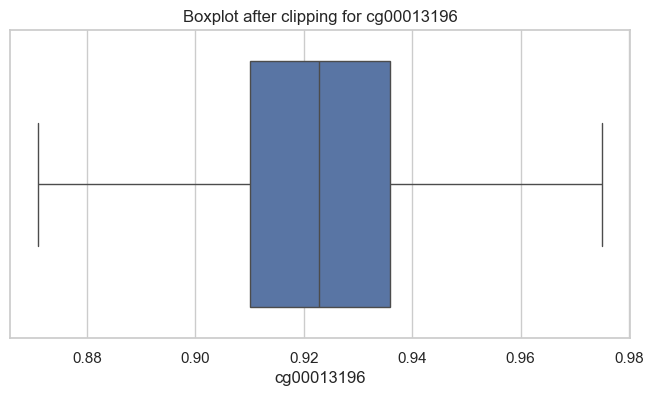

In [63]:
# Pick a CpG site (not 'age')
sample_cpg = df_cleaned.columns.difference(['age'])[0]

plt.figure(figsize=(8,4))
sns.boxplot(x=df_cleaned[sample_cpg])
plt.title(f"Boxplot after clipping for {sample_cpg}")
plt.show()


Compare descriptive statistics

In [64]:
# Select only CpG sites (exclude 'age')
cpg_columns = df_cleaned.columns.difference(['age'])

# Before clipping
stats_before = df_samples_imputed[cpg_columns].describe().T[['min', '25%', '50%', '75%', 'max']]

# After clipping
stats_after = df_cleaned[cpg_columns].describe().T[['min', '25%', '50%', '75%', 'max']]

# Combine for comparison
stats_comparison = stats_before.join(stats_after, lsuffix='_before', rsuffix='_after')
stats_comparison.head(10)  # Show first 10 CpG sites


,min_before,25%_before,50%_before,75%_before,max_before,min_after,25%_after,50%_after,75%_after,max_after
cg00013196,0.792,0.910,0.9228,0.936,1.000,0.8710,0.910,0.9228,0.936,0.9750
cg00025185,0.752,0.911,0.9240,0.938,0.999,0.8705,0.911,0.9240,0.938,0.9785
cg00038233,0.375,0.750,0.7800,0.812,0.981,0.6570,0.750,0.7800,0.812,0.9050
cg00051623,0.533,0.794,0.8140,0.833,0.983,0.7355,0.794,0.8140,0.833,0.8915
cg00058879,0.045,0.160,0.1850,0.214,0.510,0.0790,0.160,0.1850,0.214,0.2950
cg00059225,0.094,0.382,0.4100,0.438,0.769,0.2980,0.382,0.4100,0.438,0.5220
cg00080081,0.000,0.125,0.1560,0.190,0.800,0.0275,0.125,0.1560,0.190,0.2875
cg00094319,0.344,0.802,0.8240,0.845,0.955,0.7375,0.802,0.8240,0.845,0.9095
cg00094518,0.018,0.112,0.1440,0.181,0.440,0.0180,0.112,0.1440,0.181,0.2845
cg00101260,0.144,0.251,0.2720,0.293,0.652,0.1880,0.251,0.2720,0.293,0.3560


Distribution of Age

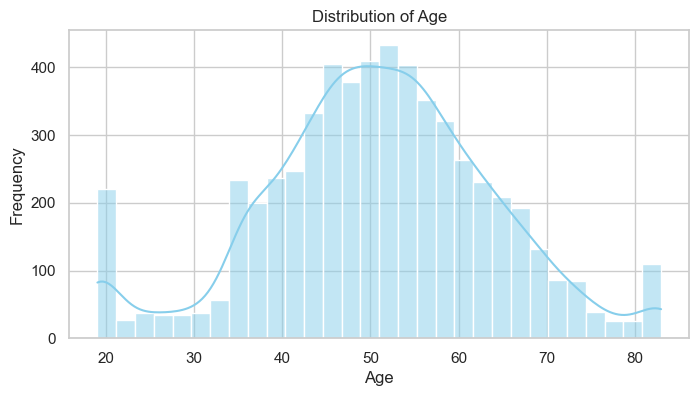

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_cleaned_clipped['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

PCA (Principal Component Analysis).

In [69]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_cleaned_clipped.drop(columns=['age'])  # CpG sites
y = df_cleaned_clipped['age']

# Optional: scale features for PCA (though values are 0-1, scaling can help)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca.shape}")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

print("Data ready for modeling!")


Original shape: (5797, 2374)
Reduced shape: (5797, 1327)
Data ready for modeling!


Linear Regression

Linear Regression Performance:
MAE: 3.71
RMSE: 4.83
R²: 0.87


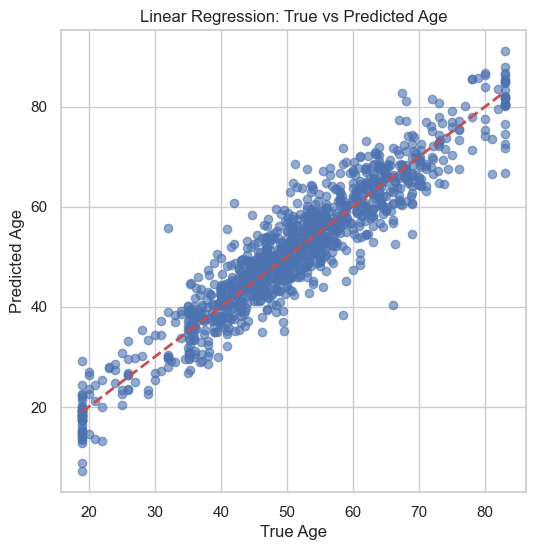

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---------------------------
# 1. Prepare data
# ---------------------------

# Features: all columns except 'age'
X = df_cleaned_clipped.drop(columns=['age']).values
y = df_cleaned_clipped['age'].values

# ---------------------------
# 2. Train/test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 3. Train Linear Regression
# ---------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ---------------------------
# 4. Make predictions
# ---------------------------
y_pred = lr_model.predict(X_test)

# ---------------------------
# 5. Evaluate model
# ---------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# ---------------------------
# 6. Optional: Plot predictions vs true
# ---------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("Linear Regression: True vs Predicted Age")
plt.show()


Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree -> MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")


Decision Tree -> MAE: 5.17, RMSE: 6.84, R²: 0.75


Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest -> MAE: 3.44, RMSE: 4.58, R²: 0.89


Gradient Boosting Regressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting -> MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, R²: {r2_gb:.2f}")


Gradient Boosting -> MAE: 3.01, RMSE: 4.18, R²: 0.91


Evaluate model performance

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


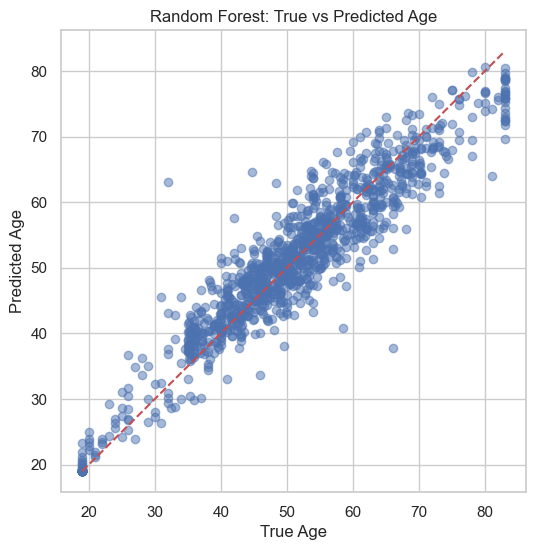

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("Random Forest: True vs Predicted Age")
plt.show()


                  LinearRegression  RandomForest  GradientBoosting
LinearRegression          1.000000      0.943301          0.954518
RandomForest              0.943301      1.000000          0.985105
GradientBoosting          0.954518      0.985105          1.000000


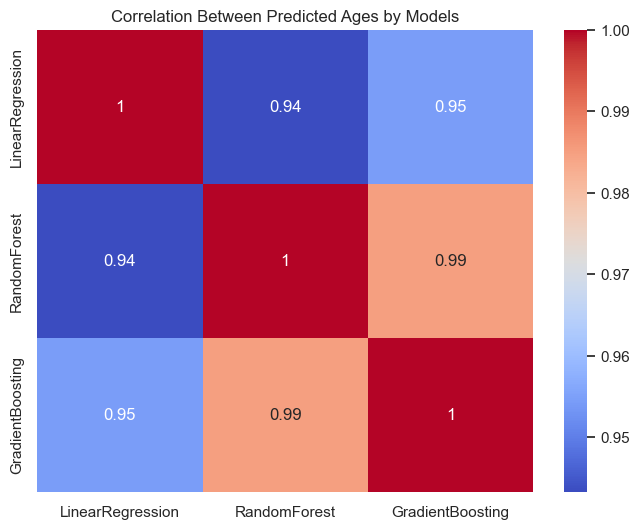

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions from multiple models:
# y_pred_lr, y_pred_rf, y_pred_gb, etc.
predictions = pd.DataFrame({
    "LinearRegression": y_pred,
    "RandomForest": y_pred_rf,
    "GradientBoosting": y_pred_gb,
    # Add more models here if needed
})

# Compute correlation matrix
corr_matrix = predictions.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Predicted Ages by Models")
plt.show()


In [ ]:
evaluate_model(y_test, y_pred, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Linear Regression -> MAE: 3.71, RMSE: 4.83, R²: 0.87
Random Forest -> MAE: 3.44, RMSE: 4.58, R²: 0.89
Gradient Boosting -> MAE: 3.01, RMSE: 4.18, R²: 0.91


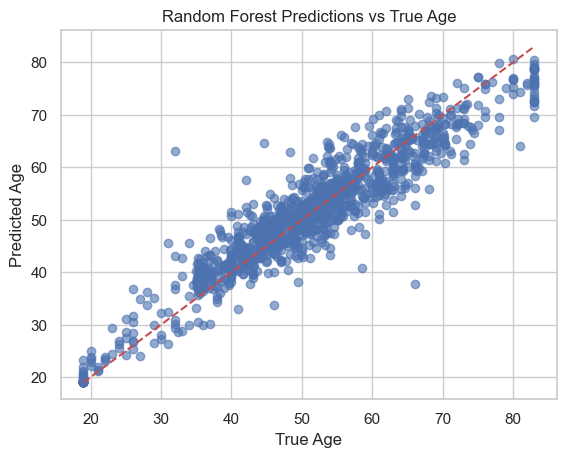

In [ ]:
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("Random Forest Predictions vs True Age")
plt.show()

In [88]:
import pandas as pd

# Example function to predict age from a new sample
def predict_age(new_sample, model, imputer, clip_lower, clip_upper):
    """
    Predict age for a new sample.
    
    Parameters:
    - new_sample: pd.DataFrame, shape (1, n_features) or (n_features,) 
                  The new sample CpG values, must match training columns
    - model: trained ML model (e.g., RandomForestRegressor)
    - imputer: fitted KNNImputer
    - clip_lower, clip_upper: Series with outlier clipping bounds
    
    Returns:
    - predicted age (float)
    """
    # Ensure new_sample is a DataFrame
    if isinstance(new_sample, pd.Series):
        new_sample = new_sample.to_frame().T
    
    # Impute missing values
    new_sample_imputed = pd.DataFrame(imputer.transform(new_sample), 
                                      columns=new_sample.columns, 
                                      index=new_sample.index)
    
    # Clip outliers
    new_sample_clipped = new_sample_imputed.clip(lower=clip_lower, upper=clip_upper, axis=1)
    
    # Predict age
    age_pred = model.predict(new_sample_clipped)
    return age_pred[0]  # return scalar

# Example usage:
# new_sample = df_samples.iloc[0, 1:]  # exclude age if present
# predicted_age = predict_age(new_sample, rf_model, imputer, lower_bound[1:], upper_bound[1:])
# print("Predicted age:", predicted_age)


In [89]:
new_sample = df_samples.iloc[0, 1:]  # exclude 'age' column
